In [265]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
import sklearn as skl
import numpy as np
import matplotlib.pyplot as plt

In [266]:
N = 25
C = 5
MIN = -10
MAX = 10

In [267]:
def generate_grid(xmin, xmax, x_n, ymin, ymax, y_n):
    xs = np.linspace(xmin, xmax, x_n)
    ys = np.linspace(ymin, ymax, y_n)
    x, y = np.meshgrid(xs, ys)
    xy = np.array([x.flatten(), y.flatten()]).T
    return xy, x, y


In [268]:
def generate_classifier_samples(n, classes):
    X = []
    y = []
    for c in range(0, classes): 
        mean = np.random.randint(-10, 10)
        stddev = np.random.random() * 3

        for _ in range(0, n):
            x = np.random.normal(mean, stddev, (2, ))
            X.append(x)
            y.append(c)
    
    return np.array(X), np.array(y)

In [269]:
def plot_decision_boundaries(X_train, y_train, model, x_n= 1000, y_n = 1000):
    Xt = X_train.transpose()
    xy, xx, yy = generate_grid(Xt[0].min(), Xt[0].max(), x_n, Xt[1].min(), Xt[1].max(), y_n)

    outputs = model.predict(xy)

    plt.contourf(xx, yy, outputs.reshape(x_n, y_n), cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X_train[:,0], X_train[:,1], c=y_train)
    plt.show()

In [270]:
X, y = generate_classifier_samples(N, C)

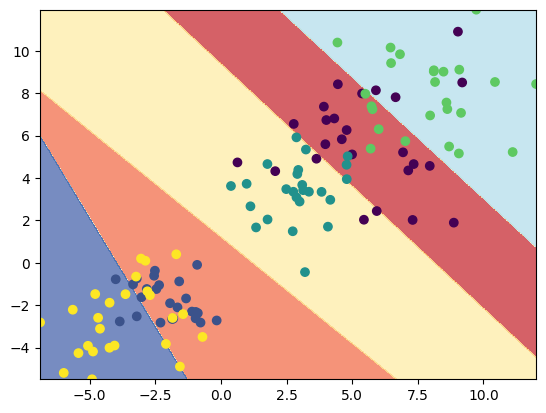

In [271]:
lda = LinearDiscriminantAnalysis('lsqr')
lda.fit(X,  y)
plot_decision_boundaries(X, y, lda)

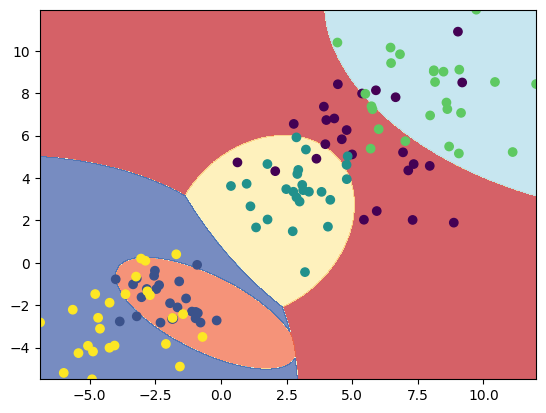

In [272]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X, y)
plot_decision_boundaries(X, y, qda)